### Comparison between Southern Oceans and Tropics retrieved DSD

Southern Oceans are defined as ocean precipitation with latitude>45 and freezing level <2.5km
Tropics are defined as ocean precipitation with latitude between -15 and 15

#### Preliminary results

    1. Retrieved Dm pdfs are not strikely different (in one region relative to the other). This is consistent with Protat et al. (2019).  However, the mean Dms appear to be significantly higher than those directly observed.  This may be a consequence of the DPR resolution.
    2. Retrieved Nw pdfs are more obviously different.  The current combined retrievals (which are not the official V6) are likely to underestimate precipitation in the tropics.  Less biased retrievals would exhibit a systematically larger Nw and (possibly) systematic smaller Dm.
    
#### Things to investigate

    1.  Is there any parameterization that increases the estimates in the southern oceans with negatively affecting the tropics?  One can try a more general parameterization (but still without explicit encoding the latitudinal behavior) or just somehow encode the latitudinal DSD behavior in the retrievals.
    2.  Why are retrieved Dm means so different from observations.  DPR resolution may be an explanation, but some kind of proof would be extremely helpful.  Biases (in their most simplistic interpretation) in the retrievals are not sufficient to explain the results as the surface precipitation estimates are not as biased as the Dms.
    

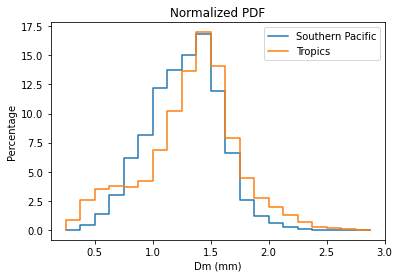

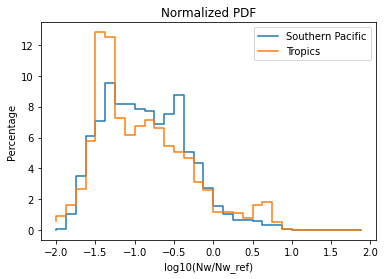

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
import pickle
import numpy as np

[zKuL_SP,zKaL_SP,nodesL_SP,retr_SP]=pickle.load(open("SP_Retrievals.pklz","rb"))
# SP is actually Southern Oceans
#zKuL, zKaL are lists of zKu and zKa observed profiles
# nodes=list containing the nodes defining the storm structure, i.e. 
# top, zero degree, clutter free, brightband top, bright band peak and surface bins
# retr_ several retrieved variables, i.e. cmb_sfc_rate1d,dpr+sfc_rate,
# precip Type(1=stratiform), surface Dm(mm), surface log10(dNw)=log10(Nw/0.08(cm^-4))
# clutter free bin, cmb piaKu, cmb piaKu, dSRT PIA(ku), dpr eps(bin clutter free), 
# dsrt reliability flag
    
hist_dm_SP=np.histogram(retr_SP[:,3],bins=0.25+0.125*np.arange(23))
hist_Nw_SP=np.histogram(retr_SP[:,4],bins=-2+0.125*np.arange(33))


[zKuL_T,zKaL_T,nodesL_T,retr_T]=pickle.load(open("Tropics_Retrievals.pklz","rb"))

hist_dm_T=np.histogram(retr_T[:,3],bins=0.25+0.125*np.arange(23))
hist_Nw_T=np.histogram(retr_T[:,4],bins=-2+0.125*np.arange(33))

plt.step(hist_dm_SP[1][:-1],100*hist_dm_SP[0]/sum(hist_dm_SP[0]))
plt.step(hist_dm_SP[1][:-1],100*hist_dm_T[0]/sum(hist_dm_T[0]))
plt.xlabel('Dm (mm)')
plt.ylabel('Percentage')
plt.legend(['Southern Pacific','Tropics'])
plt.title('Normalized PDF')

plt.figure()
plt.step(hist_Nw_SP[1][:-1],100*hist_Nw_SP[0]/sum(hist_Nw_SP[0]))
plt.step(hist_Nw_SP[1][:-1],100*hist_Nw_T[0]/sum(hist_Nw_T[0]))
plt.xlabel('log10(Nw/Nw_ref)')
plt.ylabel('Percentage')
plt.title('Normalized PDF')
plt.legend(['Southern Pacific','Tropics'])